# **Bank Marketing DataSet - Intelligent Targeting**

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. Some important aspects of a marketing campaign are as follows: 

**Segment of the Population:** To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. 

**Distribution channel to reach the customer's place:** Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.) 

**Promotional Strategy:** This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an in-depth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

You are leading the marketing analytics team for a banking institution. There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

**You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. Can you help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?**

## Data Description

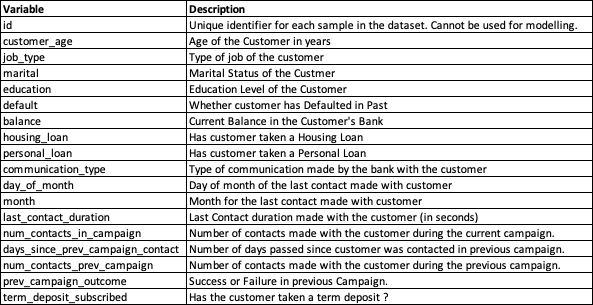

### **Hypothesis Generation**


* Are younger customers more likely to subscribe to a term deposit as compared to old customers ?

* Are people with a higher bank balance more likely subscribe to term deposit than people with low balance ?

* Does a married person have higher chances to subscribe to a term deposit compared to a single or divorced person ? 

* Does the length of the call made to the customers tell us anything about their chances of subscribing ?
(One may think that if the call length is longer, the customer executive has spent a longer time, discussing details with customer, hence the customer is more likely to subscribe).

* does customer with higher educational level have higher balance ?

* does customer who have taken Loans( personal or/and home ) are less likely to subscribe?

* does the customer with more number of contacts during the campaign are more likely to subscribe? 
this is due to the fact company contact more who shows interest in the subscription .


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import missingno as msn
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#from lightgbm import LGBMClassifier





In [3]:
def calculate_missing_value_info(df):
    missing=pd.DataFrame()
    percentage=[]
    count=[]
    total_record=len(df)
    for feature in df.columns:
        cnt=df[feature].isna().sum()
        cal=cnt/total_record
        percentage.append(cal*100)
        count.append(cnt)
    missing['feature']=df.columns
    missing['count of missing values']=count
    missing['missing %']=percentage
    missing.sort_values(by='missing %',ascending=False,inplace=True)
    missing.index=range(1,len(missing)+1)
    return missing

#### Lets read Train and Test data into pandas dataFrame train & test repectively

In [4]:
train = pd.read_csv('Train_eP48B9k.csv')
test = pd.read_csv('Test_jPKyvmK.csv')

### Brief Look at our data 

In [5]:
train.head(10)


,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
5,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,NaN,0,unknown,1
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,NaN,0,unknown,1
7,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,210.0,1.0,NaN,0,unknown,0
8,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,NaN,0,unknown,0
9,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,NaN,0,unknown,0


In [6]:
train.tail()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0
31646,id_1723,38.0,technician,single,tertiary,no,1045.0,no,no,cellular,18,aug,183.0,10.0,NaN,0,unknown,0


#### samples and variables

In [7]:
print('Train data_set has {} sample & {} variables'.format(train.shape[0],train.shape[1]))
print('Test data_set has {} sample & {} variables'.format(test.shape[0],test.shape[1]))

Train data_set has 31647 sample & 18 variables
Test data_set has 13564 sample & 17 variables


#### all variables

In [8]:
train.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [9]:
## since id is just identifier and would not be used for modelling hence we drop it.

train.drop('id',axis=1,inplace=True)

#### data_types of variables

In [10]:
train.dtypes

customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object

#### observation excluding id and target variable:
1. Numerical datatype variables:
    customer_age,balance,day_of_month,num_contacts_in_campaign, days_since_prev_campaign_contact,
    num_contacts_prev_campaign
2. Rest are string type

In [11]:
calculate_missing_value_info(train)

,feature,count of missing values,missing %
1,days_since_prev_campaign_contact,25831,81.622271
2,customer_age,619,1.955952
3,balance,399,1.260783
4,last_contact_duration,311,0.982716
5,marital,150,0.473979
6,personal_loan,149,0.470819
7,num_contacts_in_campaign,112,0.353904
8,month,0,0.000000
9,prev_campaign_outcome,0,0.000000
10,num_contacts_prev_campaign,0,0.000000


* all varible has quite less and managable amount of missing variable except one variable 
days_since_prev_campaign_contact ,here we assume that these customers are new and hence has not being contacted 
for any campaign . we will test this hypothsesis and if fail to hold,we will drop this in further analysis

In [12]:
train.nunique()

customer_age                          77
job_type                              12
marital                                3
education                              4
default                                2
balance                             6563
housing_loan                           2
personal_loan                          2
communication_type                     3
day_of_month                          31
month                                 12
last_contact_duration               1447
num_contacts_in_campaign              46
days_since_prev_campaign_contact     511
num_contacts_prev_campaign            41
prev_campaign_outcome                  4
term_deposit_subscribed                2
dtype: int64

observation:

   1. continuous feature :
        * customer_age,
        * balance,
        * last_contact_duration,
        * num_contacts_in_campaign,
        * days_sence_prev_campaign,
        * num_contacts_in_campaign
   2. Categorical feature:
        1. Nominal :
            * job_type
            * marital,
            * default,
            * housing_loan,
            * personal_loan,
            * month,
            * communication_type,
            * perv_campaign
            * job_type,
        2. ordinal :
            * education,



# **EDA**

### **Analyzing Each Variable & their relationships**

There are two types of features that we have:

1. Categorical
2. Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

1. Univariate: 

2. Bivariate:





### Segregating Categorical & Numerical Variables

In [13]:
categorical = ['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome',
'term_deposit_subscribed']

### **Categorical Features**

#### **Univariate Analysis - Pie Charts. **


In [14]:
len(categorical)

10

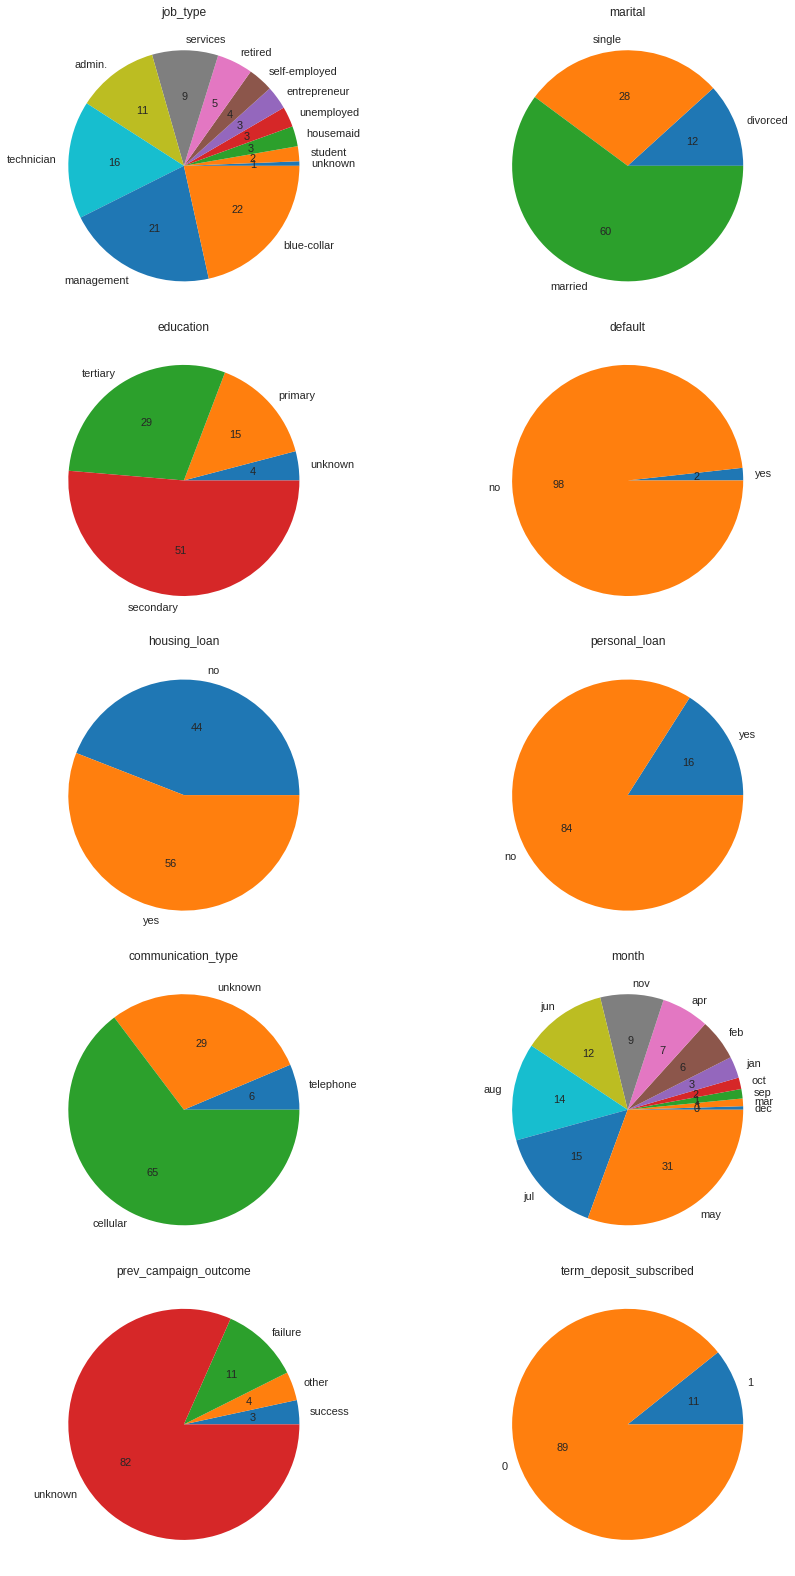

In [15]:
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
axes=[column for row in axes for column in row]

for i, c in enumerate(categorical):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=11)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

#### **Univariate Analysis - CountPlots**


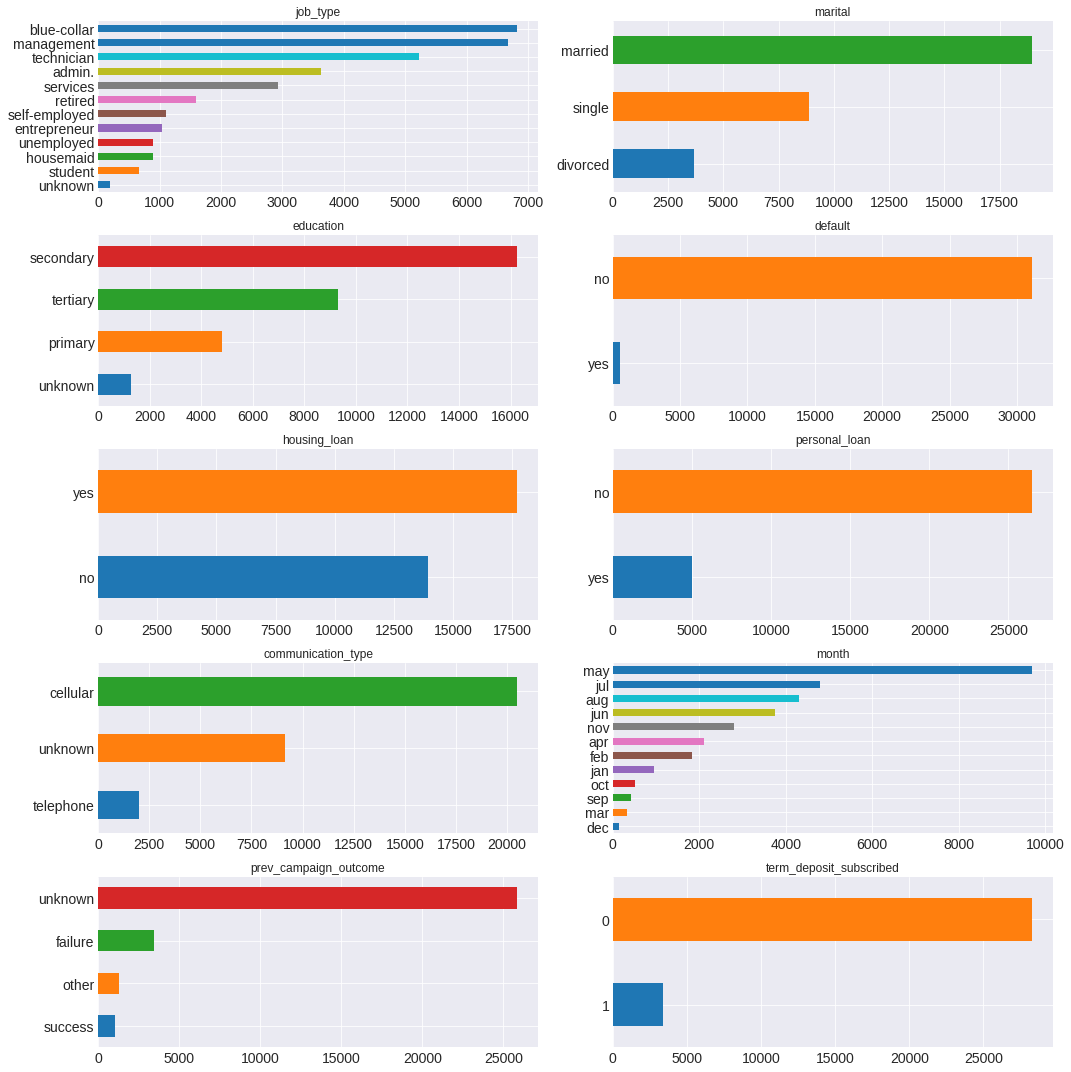

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(15,15))
axes=[column for row in axes for column in row]

for i, c in enumerate(categorical):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

#### Observations

1. Only 11 % (approx) customers had subscribed to term deposits
    * Quite obviously dataset is very imbalanced. Only about 10 % of the examples are positive.
2. 85% (approx) of the customer  taken personal loan
3. 61% (approx) of the customers are married
4. 51% (approx) of the customers  have studied senior secondary as highest qualification
5. 2 % of the customers defaulted in the past
6. prev_campaign_outcome has nearly 82% unknown data ,
    * this can be seen in relation with the hypothesis we build for variable days_since_prev_campaign_contact
      the % of unknown data in prev_campaign_outcome is approximately equal to to missing values in  days_since_prev_campaign_contact
    * this is quite expected since for new customers.

In [17]:
target='term_deposit_subscribed'

### Bivariate Analysis Relationships with Target

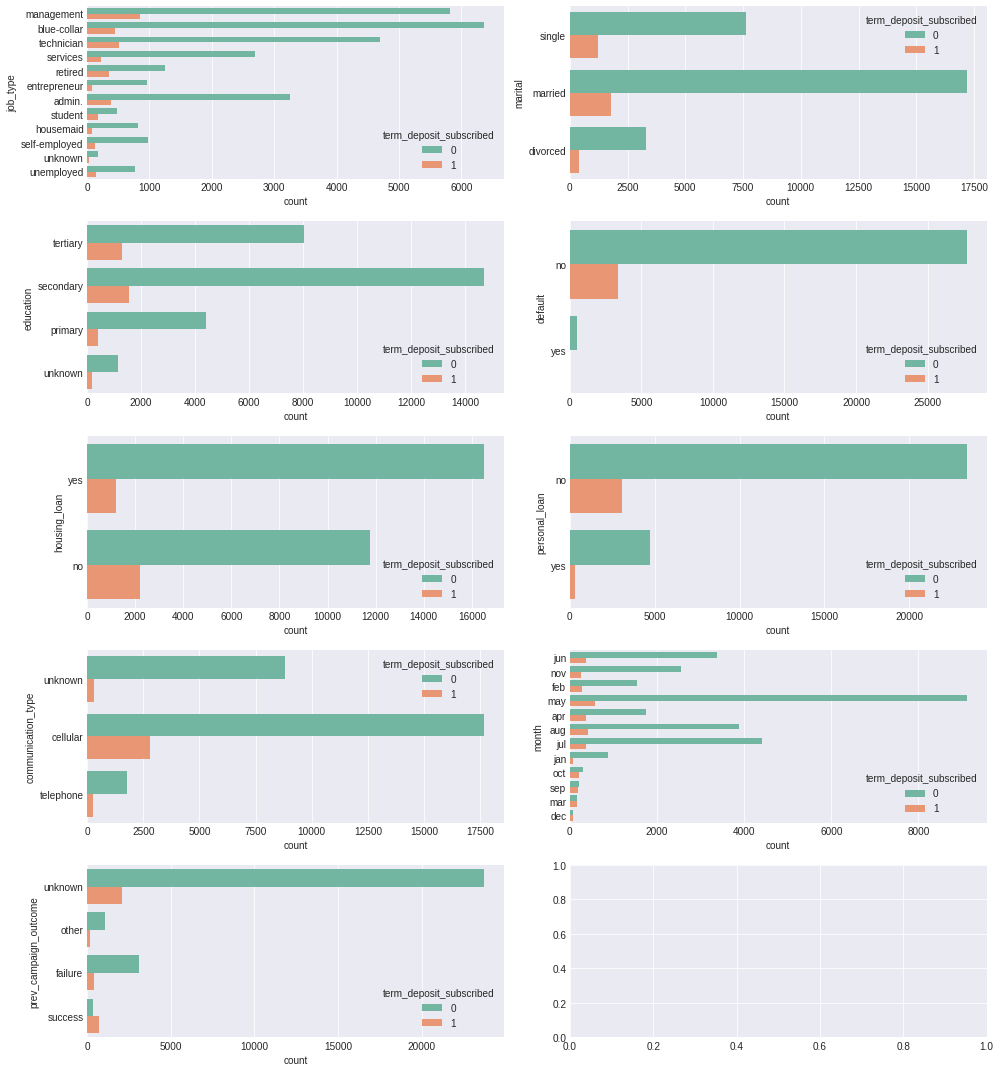

In [18]:
fig,axes=plt.subplots(5,2,figsize=(14,15))
axes=[column for row in axes for column in row]
for pos,feature in enumerate(categorical):
    if feature!=target:
        sns.countplot(data=train,y=feature,ax=axes[pos],hue=target,palette="Set2")
        #axes[pos].title()
_=plt.tight_layout()

#### Observations:
1. Customer who defaulted in past ,has nearly no possibility to subscribe ,and this what we can expect 
2. It is evident from the plot ,that a customer with any kind of loan(housing or/and personal)  is less likely to subscribe to its counter 
part . 


#### Q. Do married people have more chances of subscribing to a term deposit ?


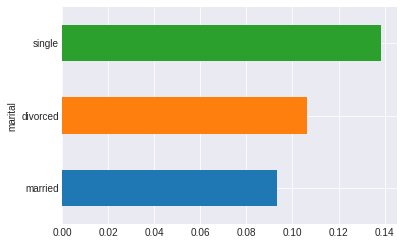

In [19]:
# mean here calculate avg. subscriptioin out of total customers of that grouped  category.
plt.clf()

_=train.groupby('marital')[target].mean().sort_values().plot(kind = 'barh')

The data shows that single people are the more likely to subscribe to a term deposit. 

#### Q. which communication type is most effective or communication has no impact on subscription?

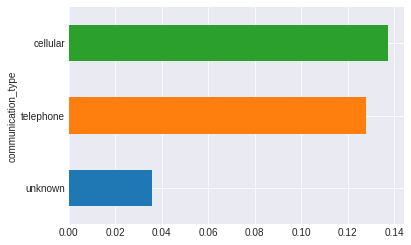

In [20]:
_ = train.groupby('communication_type')[target].mean().sort_values().plot(kind = 'barh')

customers contacted thrugh phones are more likely to subscribe as  compared to other method as email.

#### Do education gives insight of subcription?

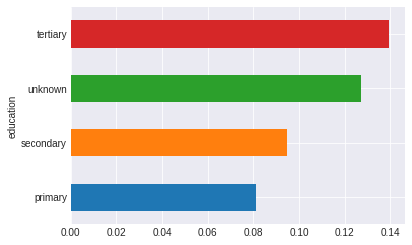

In [21]:
_ = train.groupby('education')[target].mean().sort_values().plot(kind = 'barh')

#### Do profession of a customer tells anything about subscription?

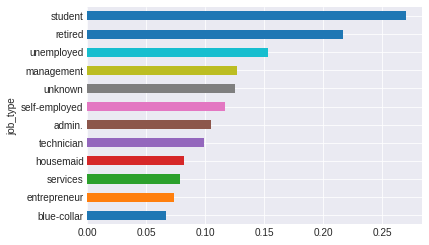

In [22]:
_ = train.groupby('job_type')[target].mean().sort_values().plot(kind = 'barh')

### **Numerical Features**

#### summary stats

In [23]:
train.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [24]:
numerical=[var for var in train.columns if var not in categorical]

In [25]:
numerical

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

### Lets check  distribution using: distplot with rug

#### overall distribution of all continuous feature

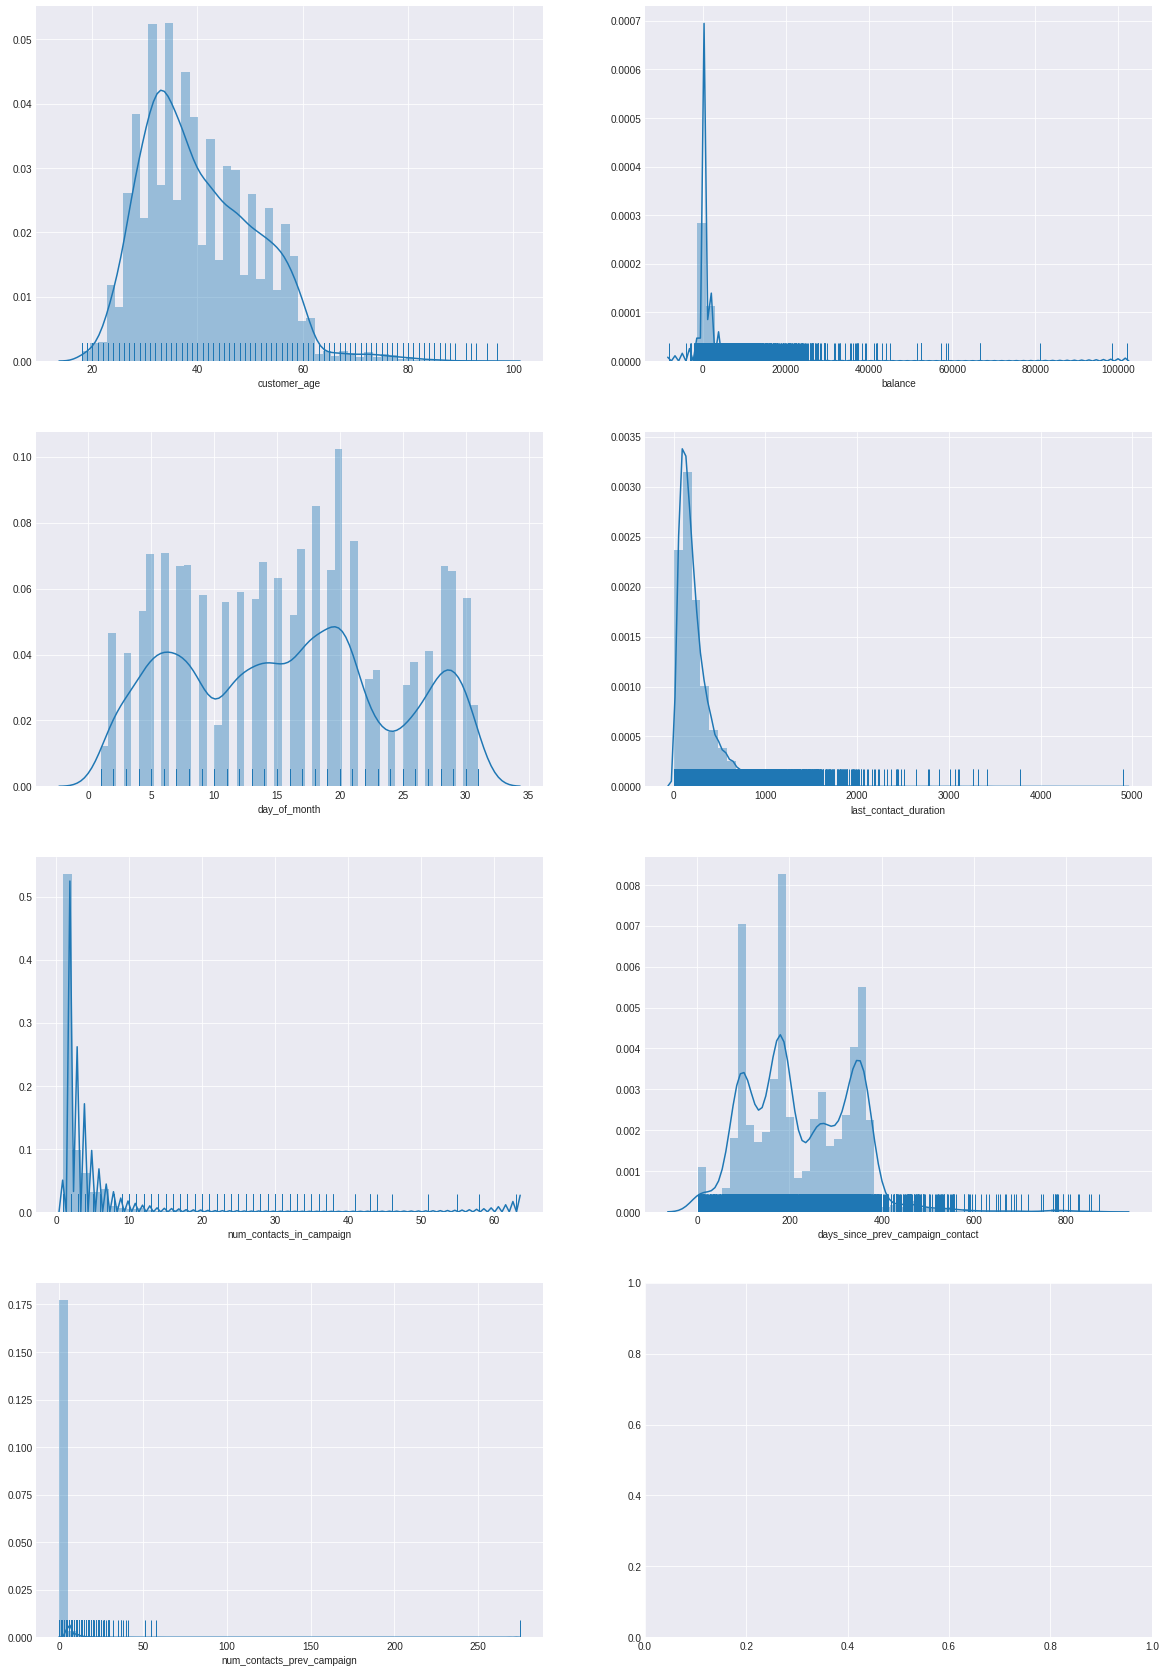

In [26]:
fig,axes=plt.subplots(4,2,figsize=(20,30))
Axes=[col for row in axes for col in row]
for pos,feature in enumerate(numerical):
    sns.distplot(train[feature],rug=True,bins=50,ax=Axes[pos] ,norm_hist=False)

1. lets check whether there is increase or decline in the number of contacts made with customers .
2.  since exlude missing values present in any columns
3.  hyothesis is increase in number of contacts means either more likely to subscribe or new potential customers who can subscribe

### Bivariate Analysis  plots - Relationships with Target Variable

In [27]:
train['term_deposit_subscribed'].value_counts()

0    28253
1     3394
Name: term_deposit_subscribed, dtype: int64

In [28]:
mask=train['term_deposit_subscribed']==1
positive=train.loc[mask,:]
negative=train.loc[~mask,:]

In [29]:
positive['term_deposit_subscribed'].value_counts()

1    3394
Name: term_deposit_subscribed, dtype: int64

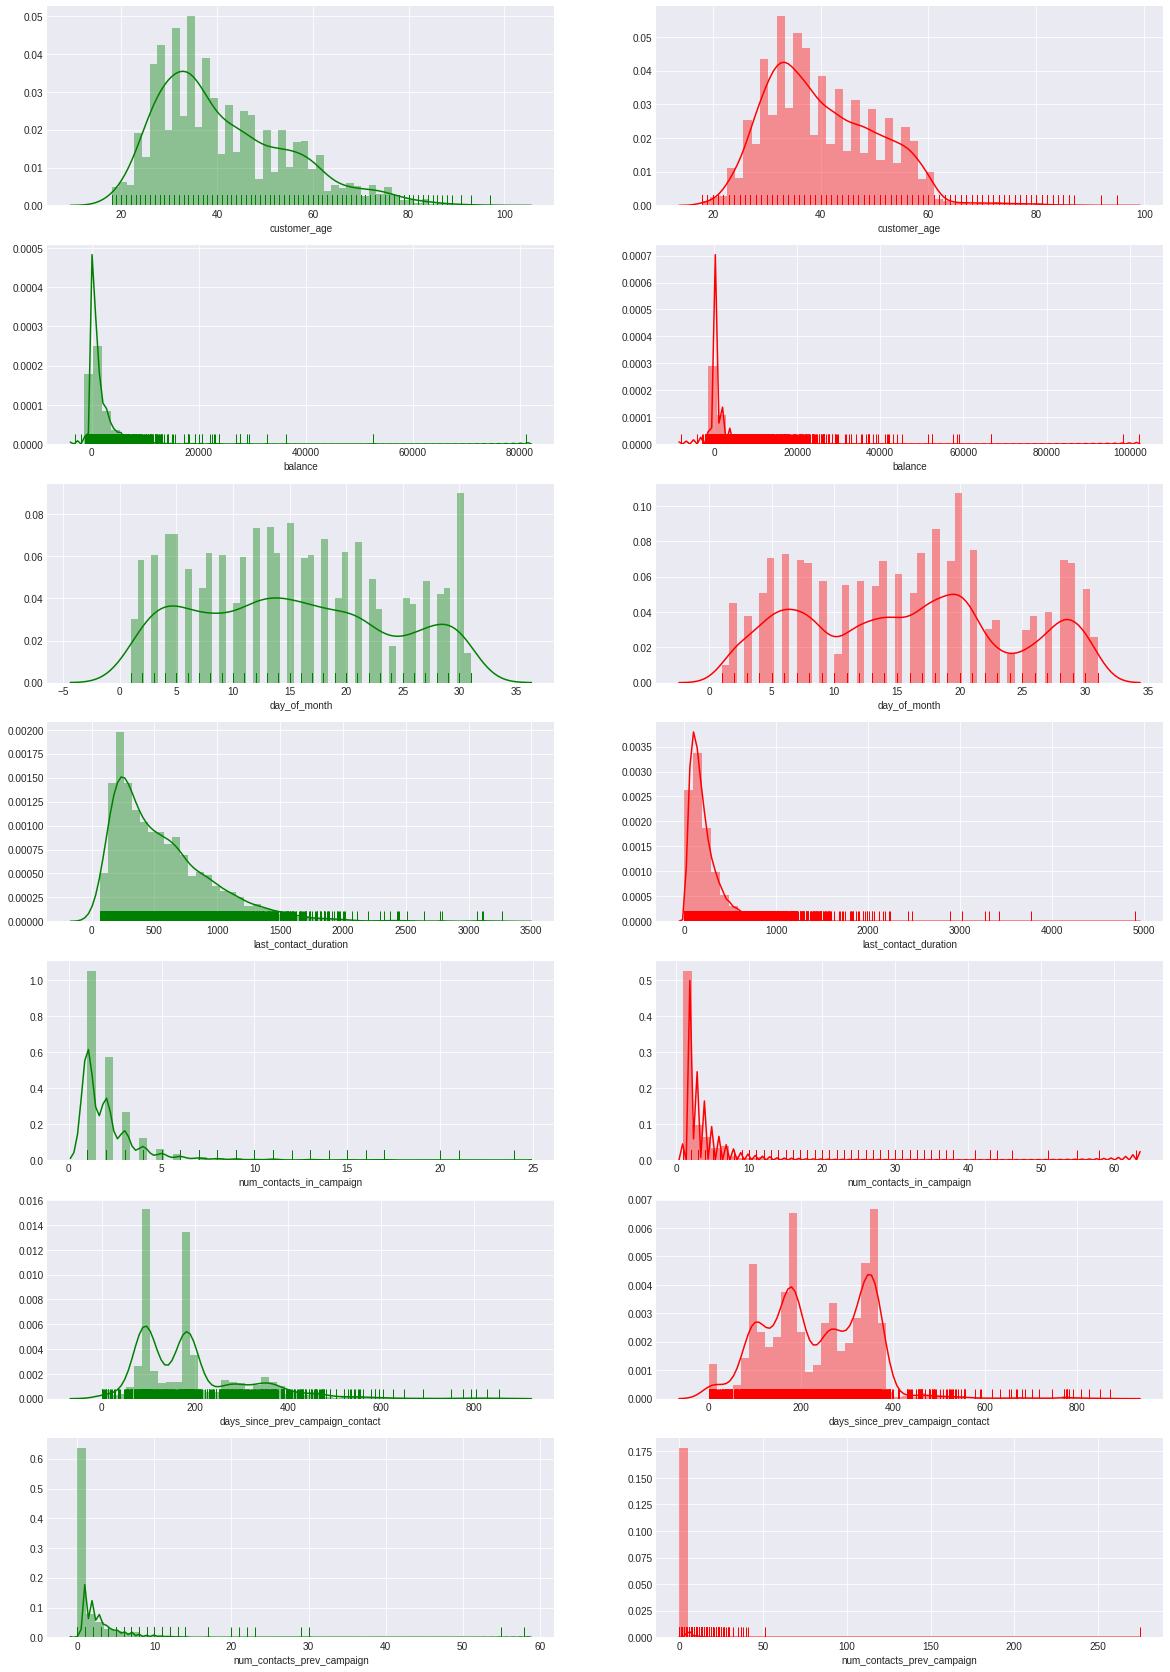

In [30]:
fig,axes=plt.subplots(7,2,figsize=(20,30))
#Axes=[col for row in axes for col in row]
for i,feature in enumerate(numerical):
    sns.distplot(positive[feature],rug=True,bins=50,ax=axes[i][0],norm_hist=False,color='g')
    sns.distplot(negative[feature],rug=True,bins=50,ax=axes[i][1] ,norm_hist=False,color='r')
    

Observations:
    1. higher the last call duration the more likely is subsription.
    2. higher the gap between last contact lesser the chance of subscription

### summary stats of positive and negative sample

In [31]:
train[target].value_counts()

0    28253
1     3394
Name: term_deposit_subscribed, dtype: int64

In [32]:
g=train.groupby(target)
target_sample=[]
for g,df in g:
    target_sample.append(df)
    

In [33]:
target_sample[0].describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,27692.000000,27890.000000,28253.000000,27975.000000,28155.000000,4523.000000,28253.000000,28253.0
mean,40.322765,1312.300072,15.896153,219.167542,2.853845,235.146142,0.513751,0.0
std,10.318910,3029.633842,8.290231,204.105452,3.264563,111.479147,2.460001,0.0
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0
25%,32.000000,58.000000,8.000000,95.000000,1.000000,153.500000,0.000000,0.0
50%,39.000000,418.000000,16.000000,164.000000,2.000000,234.000000,0.000000,0.0
75%,48.000000,1338.750000,21.000000,277.000000,3.000000,336.000000,0.000000,0.0
max,95.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,0.0


In [34]:
target_sample[1].describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,3336.000000,3358.000000,3394.000000,3361.000000,3380.000000,1293.000000,3394.000000,3394.0
mean,41.405875,1831.665873,15.172658,564.287712,2.133432,189.486466,1.239835,1.0
std,13.792839,3480.147433,8.564673,398.557211,1.879534,119.979600,2.723574,0.0
min,18.000000,-3060.000000,1.000000,63.000000,1.000000,1.000000,0.000000,1.0
25%,31.000000,226.000000,8.000000,255.000000,1.000000,94.000000,0.000000,1.0
50%,38.000000,763.000000,15.000000,465.000000,2.000000,181.000000,0.000000,1.0
75%,50.000000,2227.750000,22.000000,758.000000,3.000000,216.000000,2.000000,1.0
max,97.000000,81208.000000,31.000000,3267.000000,24.000000,854.000000,58.000000,1.0


###  Bivariate Analysis - Horizontal BarPlots

For each numerical Variable. We will plot the median of the numerical variable for:


1. When term_deposit_subscribed == 0
2. when term_deposit_subscribed == 1

**We are choosing median since median is not affected by outliers**, and our data has a lot of outlers

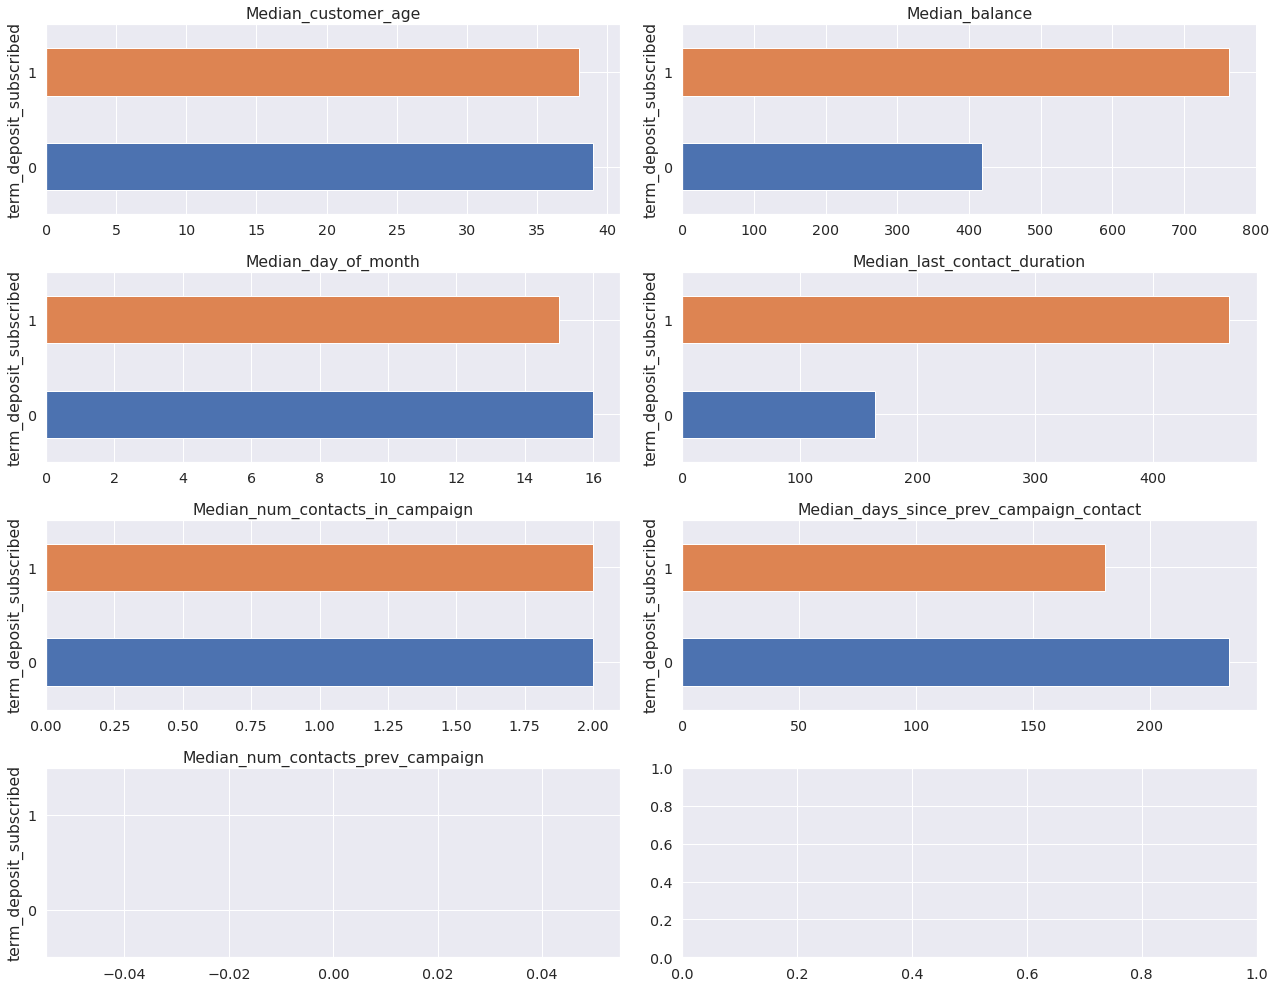

In [35]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(numerical):
  _ = train.groupby(target)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

**Q. Do people with a higher bank balance more likely subscribe to term deposit than people with low balance ?**

Median and Mean are higher for posivie sample. This definitely supports our initial hypothesis.

**Q. Does the length of the call made to the customers tell us anything about their chances of subscribing ?**

Median and Mean are higher for positive sample.So yes our hypothesis seems true.

**Q. Are younger customers more likely to subscribe to a term deposit compared to old customers ?**

It's not very clear from our above plot since we have median age of around 40 for both cases

Lets dig deeper.

We will define:
 old as Age > 60
 Not Old as Age <= 60

### Bivariate Analysis - Correlation Heatmaps

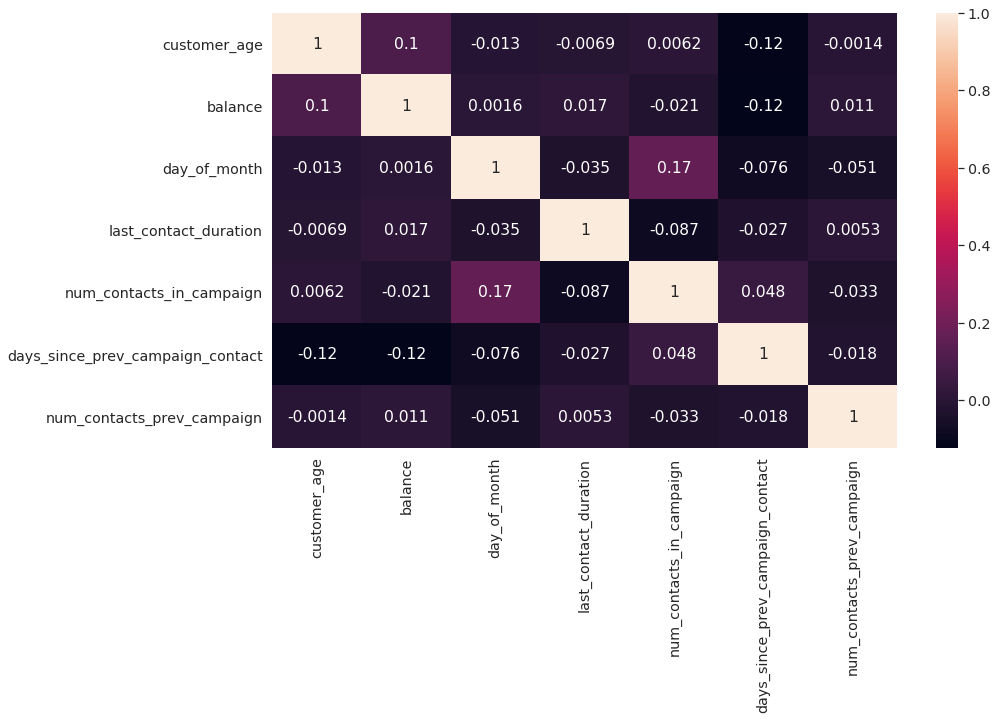

In [36]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[numerical].corr(), annot=True)

In [37]:
### loan decreses the probability of subscription ?
### is there home loan relates to personal loan?
### is there any relation in between personal loan with either/both of balance and marital status?

train.term_deposit_subscribed.value_counts(normalize=True)
train[(train.housing_loan=='yes')&(train.personal_loan=='yes')]['term_deposit_subscribed'].value_counts(normalize=True)
train[(train.housing_loan=='no')&(train.personal_loan=='no')]['term_deposit_subscribed'].value_counts(normalize=True)
train[(train.personal_loan=='yes')]['term_deposit_subscribed'].value_counts(normalize=True)
train[(train.housing_loan=='yes')]['term_deposit_subscribed'].value_counts(normalize=True)
train[(train.housing_loan=='yes')]['personal_loan'].value_counts(normalize=True)
train[(train.personal_loan=='yes')]['housing_loan'].value_counts(normalize=True)
train[(train.housing_loan=='yes')].describe()
train[(train.housing_loan=='yes')].describe()
train[(train.personal_loan=='yes')].describe()






### Missing values treatment

#### preprocessing for KNN Impute

In [39]:
train.head(10)

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
5,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,NaN,0,unknown,1
6,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,NaN,0,unknown,1
7,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,210.0,1.0,NaN,0,unknown,0
8,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,NaN,0,unknown,0
9,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,NaN,0,unknown,0


In [40]:
train.replace(['no','yes','unknown'],[0,1,np.nan],inplace=True)
test.replace(['no','yes','unknown'],[0,1,np.nan],inplace=True)

In [41]:
calculate_missing_value_info(train)

,feature,count of missing values,missing %
1,prev_campaign_outcome,25833,81.628590
2,days_since_prev_campaign_contact,25831,81.622271
3,communication_type,9151,28.915853
4,education,1292,4.082535
5,customer_age,619,1.955952
6,balance,399,1.260783
7,last_contact_duration,311,0.982716
8,job_type,199,0.628812
9,marital,150,0.473979
10,personal_loan,149,0.470819


### days_since_prev_campaign_contact

In [42]:
### missing values in days_since_prev_campaign_contact shows that they are new customers ,proved earlier in EDA
train['NewCustomer']=train.days_since_prev_campaign_contact.isna().apply(int)
train.drop('days_since_prev_campaign_contact',axis=1,inplace=True)
test['NewCustomer']=test.days_since_prev_campaign_contact.isna().apply(int)
test.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

### month

In [43]:
train.month.unique()

array(['jun', 'nov', 'feb', 'may', 'apr', 'aug', 'jul', 'jan', 'oct',
       'sep', 'mar', 'dec'], dtype=object)

In [44]:
train.replace(['jun', 'nov', 'feb', 'may', 'apr', 'aug', 'jul', 'jan', 'oct',
       'sep', 'mar', 'dec'],list(range(1,13)),inplace=True)
test.replace(['jun', 'nov', 'feb', 'may', 'apr', 'aug', 'jul', 'jan', 'oct',
       'sep', 'mar', 'dec'],list(range(1,13)),inplace=True)

### education 

In [46]:
train.education.unique()

array(['tertiary', 'secondary', 'primary', nan], dtype=object)

In [47]:
train.replace(['primary','secondary','tertiary'],[1,2,3],inplace=True)
test.replace(['primary','secondary','tertiary'],[1,2,3],inplace=True)

In [48]:
mode=int(scipy.stats.mode(train.education)[0][0])

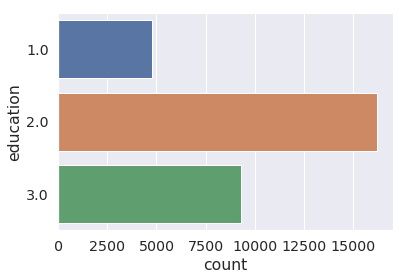

In [49]:
sns.countplot(data=train,y='education')

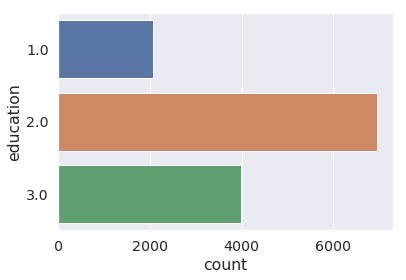

In [50]:
sns.countplot(data=test,y='education')

In [51]:
### replace missing values in education with its mode that is 2 represnting secondary

In [52]:
train.replace({'education':np.nan},mode,inplace=True)
test.replace({'education':np.nan},mode,inplace=True)

#### Now applying robustscaling followed by KNN Imputer on ordinal categorical and continuous feature

In [53]:
cols=[c for c in train.drop('term_deposit_subscribed',axis=1).columns if train[c].dtypes!='object']


In [54]:
cols

['customer_age',
 'education',
 'default',
 'balance',
 'housing_loan',
 'personal_loan',
 'day_of_month',
 'month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign',
 'NewCustomer']

In [56]:
rs=RobustScaler()
scaled_train=rs.fit_transform(train[cols])
scaled_test=rs.transform(test[cols])
ki=KNNImputer(n_neighbors=10)

In [57]:
train.loc[:,cols]=ki.fit_transform(scaled_train)
test.loc[:,cols]=ki.transform(scaled_test)

In [58]:
train.head(10)

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,NewCustomer
0,-0.6875,management,single,1.0,0.0,-0.122297,0.0,0.0,NaN,0.769231,-1.000000,0.584217,1.0,0.0,NaN,0,0.0
1,-0.3125,blue-collar,married,0.0,0.0,0.361670,-1.0,1.0,cellular,0.153846,-0.666667,-0.169611,0.0,1.0,other,0,-1.0
2,0.4375,technician,married,0.0,0.0,0.154362,-1.0,0.0,cellular,-0.846154,-0.333333,-0.367491,1.0,0.0,NaN,0,0.0
3,-0.3125,services,single,0.0,0.0,-0.333333,0.0,0.0,NaN,0.307692,0.000000,-0.244994,0.5,0.0,NaN,0,0.0
4,0.1250,blue-collar,married,-1.0,0.0,0.673378,0.0,0.0,cellular,-0.230769,0.000000,-0.612485,0.0,0.0,NaN,0,0.0
5,1.6250,retired,married,-1.0,0.0,1.812826,-1.0,0.0,cellular,0.538462,0.333333,-0.075383,-0.5,0.0,NaN,1,0.0
6,1.1250,blue-collar,married,-1.0,0.0,0.034303,-1.0,0.0,cellular,0.153846,0.666667,2.393404,1.0,0.0,NaN,1,0.0
7,-0.1250,management,married,1.0,0.0,0.149888,0.0,0.2,NaN,0.769231,0.000000,0.146054,-0.5,0.0,NaN,0,0.0
8,-0.6250,technician,married,0.0,0.0,-0.137211,0.0,0.0,cellular,0.230769,0.666667,-0.089517,0.0,0.0,NaN,0,0.0
9,0.6875,blue-collar,married,0.0,0.0,-0.031320,0.0,1.0,cellular,-0.692308,0.666667,0.254417,0.0,0.0,NaN,0,0.0


In [59]:
test.tail(10)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,NewCustomer
13554,id_25456,0.3750,blue-collar,married,0.0,0.0,-0.035794,0.0,1.0,cellular,-0.769231,0.666667,-0.202591,0.0,0.0,NaN,0.0
13555,id_35370,-0.1750,technician,married,0.0,0.0,0.032811,0.0,0.0,NaN,0.000000,0.000000,-0.310954,0.5,0.0,NaN,0.0
13556,id_35690,-0.6875,management,married,0.0,0.0,4.842655,0.0,0.0,NaN,-0.153846,0.000000,-0.409894,-0.5,0.0,NaN,0.0
13557,id_40894,-0.3125,admin.,single,0.0,0.0,-0.199105,0.0,0.0,NaN,-1.000000,-1.000000,-0.277974,-0.5,0.0,NaN,0.0
13558,id_6219,-0.4375,housemaid,single,1.0,0.0,0.597315,-1.0,0.0,cellular,1.000000,0.666667,1.601885,1.0,0.0,NaN,0.0
13559,id_42406,-0.6250,management,single,1.0,0.0,0.199851,0.0,0.0,cellular,-0.076923,-1.000000,-0.400471,-0.5,0.0,NaN,0.0
13560,id_14483,0.0750,blue-collar,married,0.0,0.0,0.115585,0.0,0.0,telephone,-0.461538,1.000000,-0.113074,-0.5,0.0,NaN,0.0
13561,id_43066,0.3750,blue-collar,married,-1.0,0.0,-0.158091,0.0,0.0,NaN,0.000000,0.000000,0.244994,1.0,0.0,NaN,0.0
13562,id_18375,0.8125,admin.,married,-1.0,0.0,-0.155108,0.0,0.0,cellular,-0.230769,0.000000,0.301531,0.0,5.0,failure,-1.0
13563,id_12898,0.7500,technician,married,0.0,0.0,-0.060403,0.0,0.0,cellular,-0.076923,1.000000,-0.362780,0.0,0.0,NaN,0.0


In [ ]:
calculate_missing_value_info(train)

In [60]:
cols

['customer_age',
 'education',
 'default',
 'balance',
 'housing_loan',
 'personal_loan',
 'day_of_month',
 'month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign',
 'NewCustomer']

In [61]:
num_cols=['customer_age','balance','last_contact_duration','num_contacts_in_campaign','num_contacts_prev_campaign']

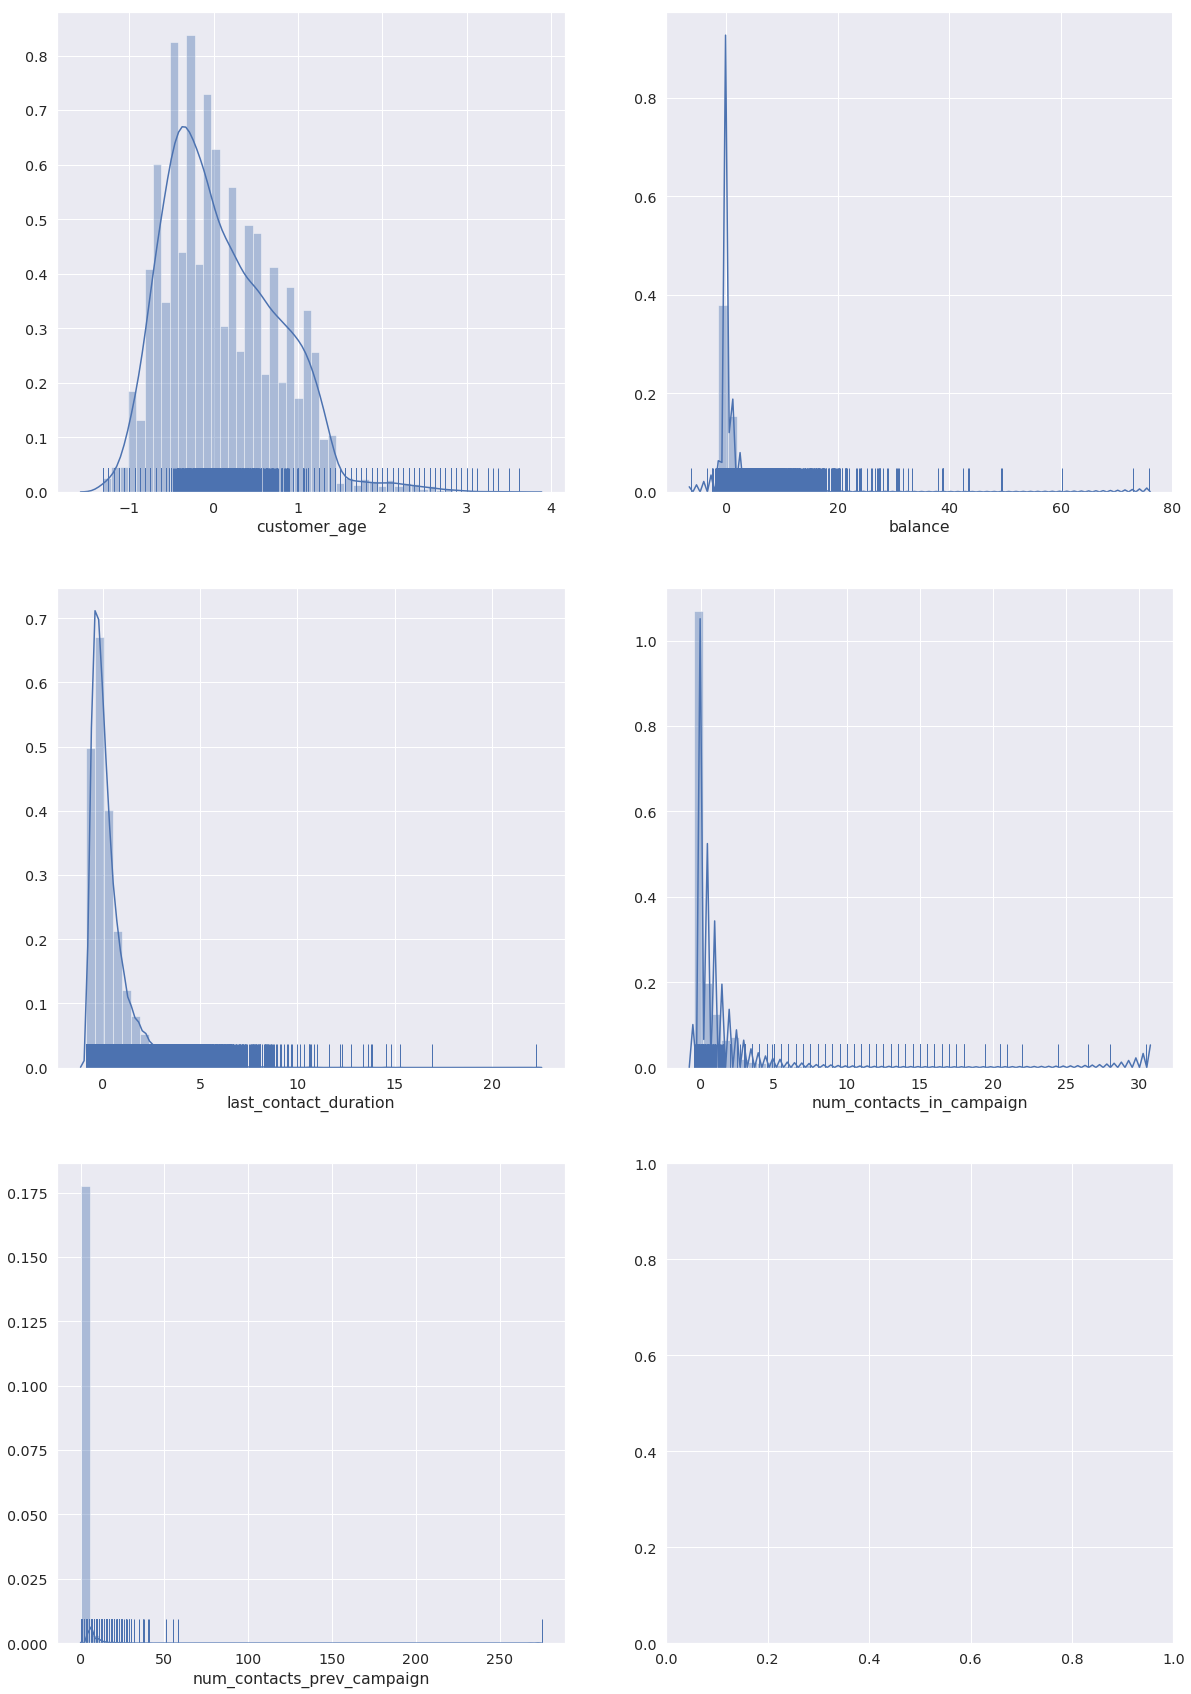

In [62]:
fig,axes=plt.subplots(3,2,figsize=(20,30))
Axes=[col for row in axes for col in row]
for pos,feature in enumerate(num_cols):
    sns.distplot(train[feature],rug=True,bins=50,ax=Axes[pos] ,norm_hist=False)

### marital

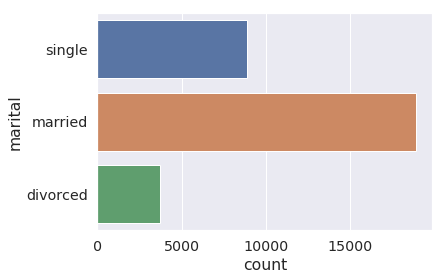

In [63]:
sns.countplot(data=train,y='marital')

In [64]:
train.marital.value_counts(normalize=True)

married     0.601486
single      0.281201
divorced    0.117313
Name: marital, dtype: float64

In [65]:
train.loc[train.marital.isna(),'marital']='married'

In [95]:
calculate_missing_value_info(train)

,feature,count of missing values,missing %
1,job_type,199,0.628812
2,customer_age,0,0.000000
3,day_of_month,0,0.000000
4,NewCustomer,0,0.000000
5,term_deposit_subscribed,0,0.000000
6,num_contacts_prev_campaign,0,0.000000
7,num_contacts_in_campaign,0,0.000000
8,last_contact_duration,0,0.000000
9,month,0,0.000000
10,communication_type,0,0.000000


### communication_type

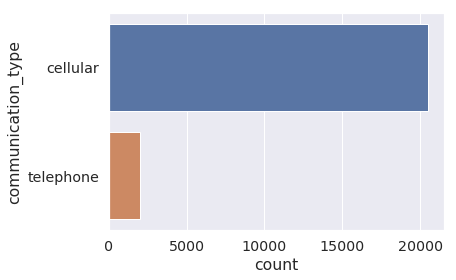

In [71]:
sns.countplot(data=train,y='communication_type')

In [72]:
train.communication_type.value_counts(normalize=True)

cellular     0.910384
telephone    0.089616
Name: communication_type, dtype: float64

In [73]:
train.communication_type.unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [74]:
train.loc[train.communication_type.isna(),'communication_type']='other'

In [75]:
test.loc[train.communication_type.isna(),'communication_type']='other'

### prev_campaign_outcome

In [ ]:
#### prev_campaign_outcome feature has missing large number of missing values
#### we know this missing value is not random and it depends whether or not customer is new .
#### lets explore this feature a bit more

In [76]:
train.prev_campaign_outcome.value_counts(normalize=True)

failure    0.597179
other      0.218782
success    0.184039
Name: prev_campaign_outcome, dtype: float64

In [78]:
train.NewCustomer.value_counts()

 0.0    25831
-1.0     5816
Name: NewCustomer, dtype: int64

In [80]:
train[train.NewCustomer==-1]['prev_campaign_outcome'].value_counts(normalize=True)

failure    0.597179
other      0.218782
success    0.184039
Name: prev_campaign_outcome, dtype: float64

In [81]:
train[train.NewCustomer==0]['prev_campaign_outcome'].value_counts(normalize=True)

Series([], Name: prev_campaign_outcome, dtype: float64)

In [ ]:
### this is quite obivious if customer is new then he/she would have no previous record

In [83]:
train.groupby('prev_campaign_outcome').agg({'term_deposit_subscribed':[np.nanmean,len]})

term_deposit_subscribed      
                                      nanmean   len
prev_campaign_outcome                              
failure                              0.113479  3472
other                                0.146226  1272
success                              0.665421  1070

In [ ]:
### we would cretae a new feature prevSubscribed which will denote whether or not ,customer who are previously 
### subscribed

In [90]:
train['prevSubscribed']=(train.prev_campaign_outcome=='success').apply(int)

In [91]:
train.prevSubscribed.value_counts()

0    30577
1     1070
Name: prevSubscribed, dtype: int64

In [92]:
test['prevSubscribed']=(test.prev_campaign_outcome=='success').apply(int)

In [94]:
train.drop('prev_campaign_outcome',axis=1,inplace=True)
test.drop('prev_campaign_outcome',axis=1,inplace=True)

### Job_type

In [ ]:
stop here